# Second test - Luong Nguyen
Introduction to Numerical Problem Solving, Spring 2017   
10.5.2017    
Helsinki Metropolia University of Applied Sciences

In [104]:
# Import necessary libraries
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Problem 1

First I define a function $h(x)$.  
(a) Plot the function $h(x)$ when $x$ from 0 to 30.  
(b) I define a function $f(x) = h(x) - 0.1 $, so when $h(x) = 0.1$, $f(x) = 0$. I then use the function `scipy.optimize.bisect` with $tol = 1e^{-6}$ to find the root of $f(x)$, which is the value of $x$ when $h(x) = 0.1$.  
(c) From the graph, we could see that the smallest value of $h(x)$ within the domain $[0, 30]$ is either within $[10, 15]$ or $[25, 30]$. I used the function `scipy.optimize.minimize` with initial guess within these ranges to find the smallest value of $h(x)$.

In [105]:
# My code
ld = 16
t = 12
v = 48
ho = 0.35

h = lambda x : ho * (sin(2 * pi * x / ld) * cos(2 * pi * t * v / ld) + exp(-x))

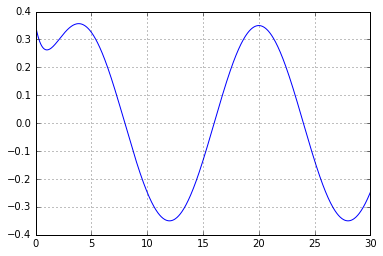

In [106]:
# a
figure()
x = np.linspace(0, 30, 1000)

plot(x, h(x))
grid()
show()

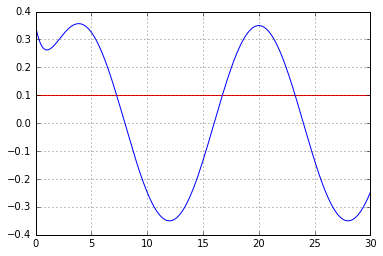

In [107]:
# b
figure()
x = np.linspace(0, 30, 1000)
axhline(0.1, color = 'r')
plot(x, h(x))
grid()
show()


In [108]:
f = lambda x : h(x) - 0.1

from scipy.optimize import bisect

print("Root found by scipy.optimize.bisect:")

x,r = bisect(f, a = 0, b = 30, xtol=1e-6, full_output=True)

print("\tx0 = {0:.6f}".format(x))
print("\tNumber of steps n = {}".format(r.iterations))

Root found by scipy.optimize.bisect:
	x0 = 7.264015
	Number of steps n = 25


In [109]:
# c
from scipy.optimize import minimize

x0 = minimize(h, 25).x[0]

print("Minimum value found by scipy.optimize.minimize:")
print("\tx0 = {0:.6f}".format(x0))
print("\tf(x0) = {0:.6f}".format(h(x0)))


Minimum value found by scipy.optimize.minimize:
	x0 = 28.000007
	f(x0) = -0.350000


In [110]:
x0 = minimize(h, 10).x[0]

print("Minimum value found by scipy.optimize.minimize:")
print("\tx0 = {0:.6f}".format(x0))
print("\tf(x0) = {0:.6f}".format(h(x0)))


Minimum value found by scipy.optimize.minimize:
	x0 = 11.999920
	f(x0) = -0.349998


Final answers:

* (a) graph above
* (b) $x_0$ = 7.264015
* (c) minimum of $h(x) = -0.35$, when $x = 28.000007$

## Problem 2

First, I found the first derivative and second derivative function of $f(x)$.  
Then I plotted the first derivative and second derivative function of $f(x)$ to prove that $f(x)$ has a global maximum for x in the domain $[-20, 20]$.  
Finally, I implemented golden section method and Newton-Raphson's method to find the maximum of $f(x)$ within 10 significant figures accuracy.


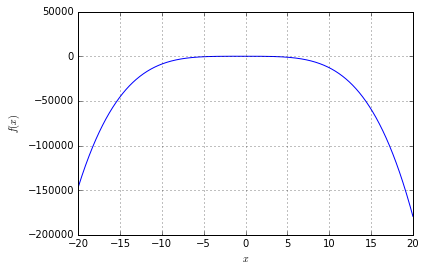

In [120]:
# My code
f = lambda x : -x**4 - 2 * x**3 - 8 * x**2 - 5 * x

figure()
x = np.linspace(-20, 20, 1000)
xlabel('$x$')
ylabel('$f(x)$')
plot(x, f(x))
grid()
show()


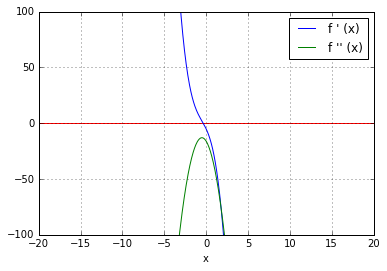

In [112]:
fp = lambda x : -4 * x**3 - 6 * x**2 - 16 * x - 5
fpp = lambda x : -12 * x**2 - 12 * x - 16 

figure()
x = np.linspace(-20, 20, 1000)
axhline(0, color = 'r')
plot(x, fp(x), label="f ' (x)")
plot(x, fpp(x), label="f '' (x)")
xlim(-20,20)
ylim(-100, 100)
grid()
legend()
xlabel('x')
show()


At the value of $x_0$ that f' (x0) = 0, the value of f''(x0) < 0 => f(x) has a local maximum at $x_0$

In [113]:
# a
gr = (math.sqrt(5) + 1) / 2

def gss(f, a, b, tol=1e-10, maxiter = 100000):
    n = 0
    c = b - (b - a) / gr
    d = a + (b - a) / gr 
    while abs(c - d) > tol and n < maxiter:
        if f(c) < f(d):
            b = d
        else:
            a = c
        
        # we recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        n += 1

    return ((b + a) / 2, n)

nf = lambda x : -f(x)
x0, n = gss(nf, -20, 20)

print("Maximum value found by golden-section search:")
print("\tx0 = {0:.10f}".format(x0))
print("\tf(x0) = {0:.10f}".format(f(x0)))
print("\tNumber of iterations = {}".format(n))

Maximum value found by golden-section search:
	x0 = -0.3472504655
	f(x0) = 0.8407939353
	Number of iterations = 53


In [114]:
fp = lambda x : -4 * x**3 - 6 * x**2 - 16 * x - 5
fpp = lambda x : -12 * x**2 - 12 * x - 16 

def newtonSearch(f, x0, tol = 1e-10, maxiter = 10000):
    """ 
    Inputs:
       f = the function 
       x0 = initial estimate of a extremum
       tol = tolerance for the extremum value
       maxiter = maximum numbers of iterations
    Outputs:
       x0 = estimate for the extremum
       n = number of iterations
    """
    n = 0
    while(abs(fp(x0)) > tol and n < maxiter):
        n += 1
        if fpp(x0) != 0:
            x0 = x0 - fp(x0) / fpp(x0)
        else:
            x0 += tol
    return x0, n 

x0, n = newtonSearch(f, 1)
print("\tRoot x0 = {0:.10f}".format(x0))
print("\tf(x0) = {0:.10f}".format(f(x0)))
print("\tNumber of iterations n = {}".format(n))

	Root x0 = -0.3472504665
	f(x0) = 0.8407939353
	Number of iterations n = 5


Final answers:
* From the graph of $f'(x)$ and $f''(x)$ we can see that at the value of $x_0$ that $f' (x0) = 0$, the value of $f''(x0) < 0$ => $f(x)$ has a local maximum at $x_0$. And also because when x is between -20 and 20, $f'(x)$ only cuts the x-axis 1 time, so that $x_0$ will also be the global maximum.
* (a) $f_{max}$ = 0.8407939353, Number of iterations = 53
* (b) $f_{max}$ = 0.8407939353, Number of iterations n = 5 (with initial value of $x_0 = 1$) 


## Problem 3

I used `scipy.stats.linregress` to get the slope and the intercept of the regression line.  
With the line, I calculated the value of $y$ when $x = 8.0$.  
From the results of `linregress`, I also got the standard error and the correlation coefficient.  
The coefficient of determination is the correlation coefficient squared.  

In [115]:
# My code
x = array([0, 2, 4, 6, 9, 11, 12, 15, 17, 19]) 
y = array([5, 6, 7, 6, 9, 8, 7, 10, 12, 12]) 

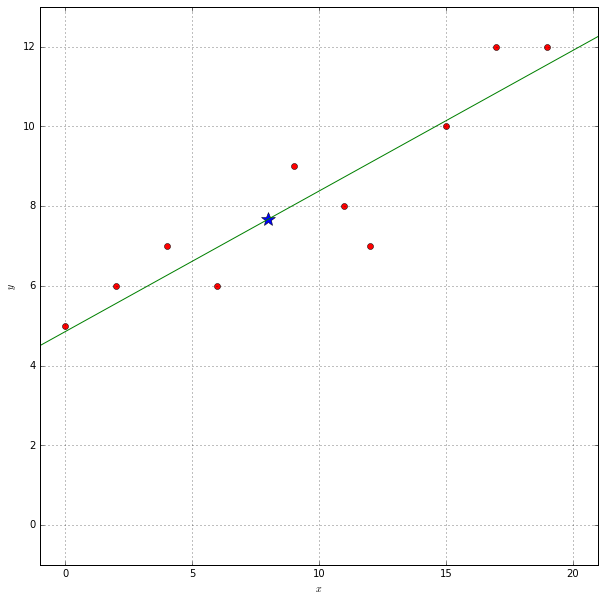

At x = 8.0, y =  7.6713


In [116]:
from scipy.stats import linregress

results = linregress(x, y)
a = results.slope
b = results.intercept

x0 = 8
y0 = a * x0 + b

x1 = linspace(-1, 21, 1000)

figure(figsize = (10, 10))
plot(x0, y0, '*', markersize = 15)
plot(x, y, 'ro')
plot(x1, a * x1 + b)
plot()
xlim(-1, 21)
ylim(-1, 13)
xlabel('$x$')
ylabel('$y$')
grid()
show()

print('At x = 8.0, y = ', around(y0, 4))

In [117]:
stderr = results.stderr
rvalue = results.rvalue

r_squared = rvalue ** 2

print('Standard error:', stderr)
print('Correlation coefficient:', rvalue)
print('Coefficient of determination:', r_squared * 100, '%')

Standard error: 0.0550335656985
Correlation coefficient: 0.914767284879
Coefficient of determination: 83.6799185485 %


Final answers:

* At $x = 8.0, y = 7.6713$
* The coefficient of determation is 83.68% which is quite high, that means the regression line is quite good to fit the data.

## Problem 4

First, I input the values of $v$ from $1.0$ to $6.0$ and $P$ but in $W$ instead of $kW$.  
Next, I plot the values of $$\frac{m * v}{P}$$  
The area under the curve is the $\Delta t$, which I use `scipy.integrate.trapz` to calculate.

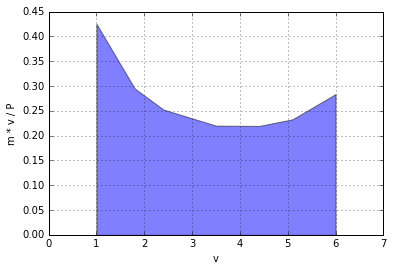

In [118]:
# My code

v = array([1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0]) 
P = 1000 * array([4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 42.3]) 

m = 2000

figure()
grid()
xlim(0, 7)
fill_between(v, m * v / P, alpha = 0.5)
xlabel('v')
ylabel('m * v / P')
show()

In [119]:
from scipy.integrate import trapz

I = m * trapz(v / P, v)
I

1.301154812863369

Final answers:

* It took the car $\Delta t = 1.30115\ s$ to accelerate from $1.0\ m/s$ to $6.0\ m/s$ 